<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/MLProject_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

# **Question 1**

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# **Question 2**

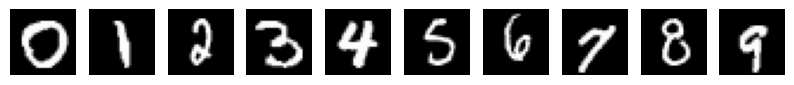

In [38]:
digit_list = list(range(10))
ind_list = []

for d in digit_list:
    d_index = np.where(y_train == d)[0]
    index = np.random.choice(d_index)
    ind_list.append(index)

plt.figure(figsize=(10,2))
for i, ind in enumerate(ind_list):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[ind], cmap='gray')
    plt.axis('off')
plt.show()